# Problem statement:
Social Network Qwerty deals with a lot of data pertaining to user chats, comments and feedback over several platforms and forums. One of the aims for the company is to separate out users who give constructive comments from those who spam. There are several types of spam, some of which are hate speech, obscenity and insults.

Qwerty wants to use Deep Learning technique to separate out spam feedback and concentrate only on the constructive ones to improve customer satisfaction as well as brand value of the company.

Use the attached data-set to develop a deep learning model to help Qwerty achieve its objectives, stating 
1. architecture, 
2. loss function and 
3. performance metric you decide to choose and your reasons for choosing them

## Key Points:
* There are several types of spam, some of which are hate speech, obscenity and insults.
* Separate out users who give constructive comments from those who spam.
* Concentrate only on the constructive ones to improve customer satisfaction as well as brand value of the company.

In [29]:
import plotly.express as px

In [77]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_colwidth=1024
df = pd.read_csv('NLPCaseStudy.csv')
df.head(10)

,id,text,hate_speech,obscene,insulting
0,0,"""\n\nWikipedia an interesting yet frustrating thing. You get pseudo-intellectuals who have no idea about the RM show yet think their """"wise"""" guesswork is better than facts from one who watches. Imagine a world run by people who haven't got a clue yet force their views & values on others in the deluded idea """"they"""" are right. The World's finances would be fucked up, entertainment would be more documentaries & real-life than comedy, music would be bland & crass (etc etc). Oops it actually is... The incompetent & inept with old money = the shit we are in today. Ha Ha Ha... oh.""",1,0,0
1,1,"""\n\nThanks\nThanks for reverting the vandalism on my talk page. ''' 24/7''' (C) """,0,0,0
2,2,"(UTC)\n\nAnd fundamental Christains are not as vehement? Go f*** yourself. 16:48, 27 March 2007",1,1,1
3,3,"Why don't you go fuck your mom 05:52, 26 Jun 2005 (UTC)",1,1,0
4,4,"Not to mention, he's a nobody. He's his biggest fan - just look at his Wikipedia page history.",0,0,0
5,5,'Prounonced Fee-on'? Eh?86.0.203.120,0,0,0
6,6,"It probably couldn't hurt to start a discussion. I wouldn't see this as a big deal, except that the template doesn't do the best job of explaining what its classification of the article means. As far as I can see, the template refers only to the position of the article link on the WP:GA page, and this is not a formal declaration of exactly where the article fits within the organization of all human knowledge. However, we might as well try to put the peak oil article link in the GA page location that makes the most sense.",0,0,0
7,7,ou leftist Wikipedia scum are an insignificant fringe group that will soon be exterminated.,1,0,0
8,8,""":I wouldn't worry SUIT. It seems that Whedonette will get what's comming to him.. 3:16 \n\n""",0,0,0
9,9,Monica Lewinsky Article \n\nExcuse me? You didn't even give a warning or anything. I clarified the reasons for my edit change in the discussion section. Please do not give out erroneous warnings for things that do not line up with your view-point. Be neutral first and foremost. I did not do anything warranting a vandalism warning. Please refrain from this in the future.,0,0,0


In [78]:
df.shape

(31634, 5)

In [79]:
df.dtypes

id              int64
text           object
hate_speech     int64
obscene         int64
insulting       int64
dtype: object

## Data Preparation

* If any text associated with one of the labels hate_speech, obscene, insulting treat it as spam
* If a text doesn't have any of the labels hate_speech, obscene and insulting treate it as constructive

In [80]:
df.loc[:,'label']='spam'
df.loc[(df.hate_speech==0) & (df.obscene==0) & (df.insulting==0),"label"] = 'constructive'

## Class Imbalance:

* Total data points :: 31634
* Constructive Comments :: 15788
* Spam Comments :: 15846

> #### There is no class imbalance problem in the dataset

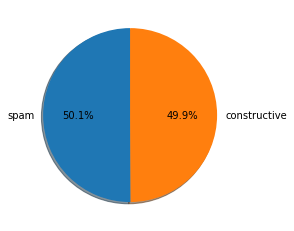

In [100]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.pie(df.label.value_counts().values,labels=df.label.value_counts().keys(), autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

## Cleanup the text

In [368]:
# Code Reference:  https://www.kaggle.com/fizzbuzz/toxic-data-preprocessing
RE_PATTERNS = {
    ' american ':
        [
            'amerikan'
        ],

    ' fuck':
        [
            '(f)(u|[^a-z0-9 ])(c|[^a-z0-9 ])(k|[^a-z0-9 ])([^ ])*',
            '(f)([^a-z]*)(u)([^a-z]*)(c)([^a-z]*)(k)',
            ' f[!@#\$%\^\&\*]*u[!@#\$%\^&\*]*k', 'f u u c',
            '(f)(c|[^a-z ])(u|[^a-z ])(k)', r'f\*',
            'feck ', ' fux ', 'f\*\*', 
            'f\-ing', 'f\.u\.', 'f###', ' fu ', 'f@ck', 'f u c k', 'f uck', 'f ck','f\'ing'
        ],

    ' ass ':
        [
            '[^a-z]ass ', '[^a-z]azz ', 'arrse', ' arse ', '@\$\$'
                                                           '[^a-z]anus', ' a\*s\*s', '[^a-z]ass[^a-z ]',
            'a[@#\$%\^&\*][@#\$%\^&\*]', '[^a-z]anal ', 'a s s'
        ],

    ' ass hole ':
        [
            ' a[s|z]*wipe', 'a[s|z]*[w]*h[o|0]+[l]*e', '@\$\$hole'
        ],

    ' bitch ':
        [
            'b[w]*i[t]*ch', 'b!tch',
            'bi\+ch', 'b!\+ch', '(b)([^a-z]*)(i)([^a-z]*)(t)([^a-z]*)(c)([^a-z]*)(h)',
            'biatch', 'bi\*\*h', 'bytch', 'b i t c h'
        ],

    ' bastard ':
        [
            'ba[s|z]+t[e|a]+rd'
        ],

    ' trans gender':
        [
            'transgender'
        ],

    ' gay ':
        [
            'gay'
        ],

    ' cock ':
        [
            '[^a-z]cock', 'c0ck', '[^a-z]cok ', 'c0k', '[^a-z]cok[^aeiou]', ' cawk',
            '(c)([^a-z ])(o)([^a-z ]*)(c)([^a-z ]*)(k)', 'c o c k'
        ],

    ' dick ':
        [
            ' dick[^aeiou]', 'deek', 'd i c k'
        ],

    ' suck ':
        [
            'sucker', '(s)([^a-z ]*)(u)([^a-z ]*)(c)([^a-z ]*)(k)', 'sucks', '5uck', 's u c k'
        ],

    ' cunt ':
        [
            'cunt', 'c u n t'
        ],

    ' bull shit ':
        [
            'bullsh\*t', 'bull\$hit'
        ],

    ' homo sex ual':
        [
            'homosexual'
        ],

    ' jerk ':
        [
            'jerk'
        ],

    ' idiot ':
        [
            'i[d]+io[t]+', '(i)([^a-z ]*)(d)([^a-z ]*)(i)([^a-z ]*)(o)([^a-z ]*)(t)', 'idiots'
                                                                                      'i d i o t'
        ],

    ' dumb ':
        [
            '(d)([^a-z ]*)(u)([^a-z ]*)(m)([^a-z ]*)(b)'
        ],

    ' shit ':
        [
            'shitty', '(s)([^a-z ]*)(h)([^a-z ]*)(i)([^a-z ]*)(t)', 'shite', '\$hit', 's h i t','s*#t'
        ],

    ' shit hole ':
        [
            'shythole'
        ],

    ' retard ':
        [
            'returd', 'retad', 'retard', 'wiktard', 'wikitud'
        ],

    ' rape ':
        [
            ' raped'
        ],

    ' dumb ass':
        [
            'dumbass', 'dubass'
        ],

    ' ass head':
        [
            'butthead'
        ],

    ' sex ':
        [
            'sexy', 's3x', 'sexuality'
        ],


    ' nigger ':
        [
            'nigger', 'ni[g]+a', ' nigr ', 'negrito', 'niguh', 'n3gr', 'n i g g e r'
        ],

    ' shut the fuck up':
        [
            'stfu'
        ],

    ' pussy ':
        [
            'pussy[^c]', 'pusy', 'pussi[^l]', 'pusses'
        ],

    ' faggot ':
        [
            'faggot', ' fa[g]+[s]*[^a-z ]', 'fagot', 'f a g g o t', 'faggit',
            '(f)([^a-z ]*)(a)([^a-z ]*)([g]+)([^a-z ]*)(o)([^a-z ]*)(t)', 'fau[g]+ot', 'fae[g]+ot',
        ],

    ' mother fucker':
        [' motha ', ' motha f', ' mother f', 'motherucker',],

    ' whore ':
        ['wh\*\*\*', 'w h o r e'
        ],
}

APOSTROPHE_MAP = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"tryin'":"trying"
}

eng_stopwords = {'a',
 'about',
 'above',
 'after',
 'again',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'd',
 'did',
 'do',
 'does',
 'doing',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'has',
 'have',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'more',
 'most',
 'my',
 'myself',
 'now',
 'o',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'own',
 're',
 's',
 'same',
 'she',
 "she's",
 'should',
 "should've",
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 "that'll",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 'these',
 'they',
 'this',
 'those',
 'through',
 'to',
 'too',
 'under',
 'until',
 'up',
 've',
 'very',
 'was',
 'we',
 'were',
 'what',
 'when',
 'where',
 'which',
 'while',
 'who',
 'whom',
 'why',
 'will',
 'with',
 'won',
 'y',
 'you',
 "you'd",
 "you'll",
 "you're",
 "you've",
 'your',
 'yours',
 'yourself',
 'yourselves',
'utc'}

In [308]:
# df.text.head(50).apply(lambda x: remove_dates(x))
# df.text.head(10)

In [ ]:
# https://drive.google.com/file/d/0B1yuv8YaUVlZZ1RzMFJmc1ZsQmM/view
# https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python
# https://chendianblog.wordpress.com/2016/11/25/different-types-of-tokenizers-in-nltk/
# https://stackoverflow.com/questions/17238587/python-regular-expression-to-remove-repeated-words

In [392]:
import string
import re
import nltk
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer 

# Tweet tokenizer does not split at apostophes which is what we want
tokenizer=TweetTokenizer()
lem = WordNetLemmatizer()
class Preprocessor(object):
    def __inint
def remove_dates(comment):
    comment = comment.lower()
    comment = re.sub("""(jan|january|feb|february|mar|march|apr|april|may|jun|june|jul|july|aug|august|sep|september|oct|october|nov|november|dec|december)\s\d{1,2}\s\d{2,4}""", ' ', comment)
    comment = re.sub("""\d{1,2}\s(jan|january|feb|february|mar|march|apr|april|may|jun|june|jul|july|aug|august|sep|september|oct|october|nov|november|dec|december)\s\d{2,4}""", ' ', comment)
    comment = re.sub("""\d{1,2}:\d{1,2}""", ' ', comment)
    comment = re.sub("""utc""", ' ', comment)
    comment = " ".join(comment.split())
    return comment

def clean_text(comment):
    """
    This function receives comments and returns clean word-list
    """
    # convert comment to lower case
    comment=comment.lower()
    
    #remove \n (new line characters)
    comment=re.sub("\\n"," ",comment)
    
    # remove urls
    comment = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", comment)
    
    # remove ip addresses
    comment=re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}"," ",comment)
    
    #remove usernames
    comment=re.sub("\[\[.*\]"," ",comment)
    
    # remove date time and time zone
    comment = remove_dates(comment)

    # remove repeating characters in a word ex: abbbbcd ==> abcd
    pattern = re.compile(r"(.)\1{2,}", re.DOTALL)
    comment = pattern.sub(r"\1",comment)
    
    # remove repeating words ex: you said that that that ==> you said that
    comment = re.sub(r'(\W|^)(.+)\s\2', '', comment)

    # substitute regex patterns for vulgar words ex: f***k ==> fuck
    for target, patterns in RE_PATTERNS.items():
        for pat in patterns:
            comment = re.sub(pat, target, comment)
    
    #remove if there are any extra spaces in comment
    comment = " ".join(comment.split())
    
    # perform tokenization
    words=tokenizer.tokenize(comment)
    
    # (')aphostophe  replacement (ie)   you're --> you are 
    words=[APOSTROPHE_MAP[word] if word in APOSTROPHE_MAP else word for word in words]
    
    # remove special chars
    comment = re.sub(r"[^a-z0-9!#\$%\^\&\*_\-,\.\'()\/ ]", ' ', comment)
    
    # perform lemmatization
    words=[lem.lemmatize(word, "v") for word in words]
#     words = [w for w in words if not w in eng_stopwords]
    
    clean_sent=" ".join(words)
    # remove any non alphanum,digit character
    clean_sent=re.sub("\W+"," ",clean_sent)
    clean_sent=re.sub("  "," ",clean_sent)
    return(clean_sent)

In [390]:
text = df.iloc[[8675]]['text'].values[0]
# re.sub(r'\b(\w+)( \1\b)+', r'\1', text.lower()) #remove duplicated words in row
# re.sub(r'^([^_]+)(?:_\1)*(.*)_\d+\.\w+$', r'\1\2', text.lower())

# remove punctuation
# the unicode flag makes it work for more letter types (non-ascii)
# no_punc = re.sub(r'[^\w\s]', '', text, re.UNICODE)
# print('No punctuation:', no_punc)

# remove duplicates
re_output = re.sub(r'(\W|^)(.+)\s\2', '', text)

print('No duplicates:', re_output)

No duplicates: LEAVE 4 A FUKIN SNAK AND I RETRN WITH A FUKIN BLCK YOU ARE ALLLLLLLLLLLLLLLLLLLLLLLLLLLLLLL FUKERSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS YOU SUCK DICK


In [393]:
df['pt'] = df.text.apply(lambda x: clean_text(x))

In [394]:
# comment with repeated words
# df.iloc[[8675]]['text'].values

# comment with time
# df.iloc[[14461]]['text'].values

# ip address
# 30754

# date time timezon
# 12885

In [397]:
# df.iloc[[8675]][['text','pt']]

In [399]:
df[['text','pt']].sample(50)

,text,pt
17824,MIND YOUR OWN BUSINESS BUSY BODY \nThis must be removed form this talk page now dumb ass...\n\nfull real name are not to be publish on wikipedia.....\n\nRemove it now!!!,mind your own business busy body this must be remove form this talk page now dumb ass full real name be not to be publish on wikipedia remove it now
4584,"""\n\nI find it amazing how you can write so much, and yet, say so little. That massive essay above is just the same stuff you've been saying for ages and everyone here has already rejected it (Apart from about the document Kolzene presented, I agree that that can certainly be used for the article). Again you're going on about this Urbanates thing, you said we should replace the Urbanates section with some undefined notion of """"Urban Planning"""", but you don't seem to get the fact that Urban Planning and Urbanates are exactly the same thing in Technocracy. A Technate wouldn't go on building old style cites, it would be build Urbanates, therefore any Urban Planning will be the planning of Urbanates. You say """"I would suggest Hibernian that you or someone make a file of the Wilton Ivey piece, and use that in reference to Urban Planning."""", but that is essentially what is already there, the Urbanates article was mostly written in reference to the ideas Wilton Ivey, etc. If you want a longer section about what ...",i find it amaze how you can write so much and yet say so little that massive essay above be just the same stuff you have be say for age and everyone here have already reject it apart from about the document kolzene present i agree can certainly be use for the article again you are go on about this urbanates thing you say we should replace the urbanates section with some undefined notion of urban plan but you do not seem to get the fact that urban plan and urbanates be exactly the same thing in technocracy a technate would not go on build old style cite it would be build urbanates therefore any urban plan will be the plan of urbanates you say i would suggest hibernian that you or someone make a file of the wilton ivey piece and use that in reference to urban plan but that be essentially what be already there the urbanates article be mostly write in reference to the ideas wilton ivey etc if you want a longer section about what a technate might do with cities before it replace them with urbanates which woul...
29517,"Why was this one deleted when, for example, http://en.wikipedia.org/wiki/Image:Soundtrack_Pro.png, and lots of other icons like it, are still present, without a fair use rationale?",why be this one delete when for example and lot of other icons like it be still present without a fair use rationale
24848,All you need to know about the game (which I've played and it's awesome) is at www.ben10thevideogame.com. Bakutrix,all you need to know about the game which I have play and it is awesome be at bakutrix
12706,"YOu moron, do not accuse me to go and study. The fools and used like condom people with small or with no brains are YOU! That is also a reason why never Pashtuns can ever establish their fake claims (such as on Ghurids). Because you have no roots to anything. You are not related. Puta Khazana claims are fabricated like the shamefull book self. The bi-sexual Abdul Hai Habibi wanted to copy Shahnama... that´s all behind Pashtun nationalism. New archeological studies led by Dr. Zmarai show the Ghurids beeing non-Pashtuns. Now go and kill Zmarai who spit in the face of Abdul Hai Habibi and clean with Puta Khazana it´s ass.\n\nWhat has now your valueless and waste comment has to do that Iranians were to the rising of Safavids Sunnis? That´s how a Pashtun think. Your logic is the logic of long ear Afghans, not connected or compatible with the educated world of human-beeings. Your comment on my comment should make 2+2=4 ... but since your comment have no connection to my comment the result will stay 2 (2+0=2). T...",you moron do not accuse me to go and study the fool and u

In [102]:
tokenizer = PatternTokenizer()
df['processed_text'] = tokenizer.process_ds(df.text).str.join(sep=" ")

NLTK Tokenizers:
* WhitespaceTokenizer - uses white space to split
* WordPunctTokenizer - uses punctuations to split
* TreebankTokenizer - splits word contractions into two tokens. Ex: Can't ==> [ca, n't]

In [144]:
df.text = df.text.str.strip()
df['no_of_chars'] = df.text.apply(lambda x: len(x))
df['no_of_words'] = df.text.str.split().apply(len)

In [158]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,31634.0,15816.500000,9132.093544,0.0,7908.25,15816.5,23724.75,31633.0
hate_speech,31634.0,0.483467,0.499734,0.0,0.00,0.0,1.00,1.0
obscene,31634.0,0.267086,0.442445,0.0,0.00,0.0,1.00,1.0
insulting,31634.0,0.239426,0.426740,0.0,0.00,0.0,0.00,1.0
text_len,31634.0,349.477872,597.564092,6.0,76.00,166.0,361.00,5000.0
no_of_words,31634.0,60.061484,101.575814,1.0,13.00,29.0,63.00,1411.0
no_of_chars,31634.0,349.477872,597.564092,6.0,76.00,166.0,361.00,5000.0


In [164]:
df[df.no_of_words<3]

,id,text,hate_speech,obscene,insulting,label,processed_text,text_len,no_of_words,no_of_chars
155,155,#NAME?,1,1,1,spam,name,6,1,6
574,574,design \n\nMedia:Example.ogg,0,0,0,constructive,design media example ogg,27,2,27
1493,1493,#NAME?,0,0,0,constructive,name,6,1,6
1622,1622,HELLO DICKHEAD68.75.164.65,1,0,0,spam,hello dick ead,26,2,26
1666,1666,#NAME?,0,0,0,constructive,name,6,1,6
...,...,...,...,...,...,...,...,...,...,...
31044,31044,#NAME?,0,0,0,constructive,name,6,1,6
31231,31231,#NAME?,1,1,0,spam,name,6,1,6
31374,31374,or where?86.160.60.82,0,0,0,constructive,or where,21,2,21
31404,31404,{{unblock|That fuckin,1,1,0,spam,unblock that fuck,21,2,21


In [148]:
df[['no_of_chars','no_of_words','label']].head()

,no_of_chars,no_of_words,label
0,581,103,spam
1,79,15,constructive
2,95,15,spam
3,56,12,spam
4,94,18,constructive


In [157]:
# df[df.no_of_words<5].sample(20)

In [142]:
df[df.label=='constructive'][['no_of_chars','no_of_words']].describe().T

,count,mean,std,min,25%,50%,75%,max
text_len,15788.0,398.035723,570.188086,6.0,103.0,216.0,451.0,4994.0
no_of_words,15788.0,67.781670,95.064083,1.0,18.0,37.0,77.0,993.0


In [143]:
df[df.label=='spam'][['text_len','no_of_words']].describe().T

,count,mean,std,min,25%,50%,75%,max
text_len,15846.0,301.097753,619.892398,6.0,60.0,127.0,279.0,5000.0
no_of_words,15846.0,52.369557,107.123853,1.0,11.0,23.0,49.0,1411.0


In [130]:
df[df.label!='constructive'].text_len.describe()

count    15846.000000
mean       301.097753
std        619.892398
min          6.000000
25%         60.000000
50%        127.000000
75%        279.000000
max       5000.000000
Name: text_len, dtype: float64

In [129]:
df[df.label=='spam'].text_len.describe()

count    15846.000000
mean       301.097753
std        619.892398
min          6.000000
25%         60.000000
50%        127.000000
75%        279.000000
max       5000.000000
Name: text_len, dtype: float64

In [111]:
from spacy.lang.en import English
nlp = English()

In [118]:
docs = nlp('STOP POSTING WARNIGN ON MY TALK PAGE ITS FUCKING GAY AS SHIT AND I DONT GIVE A FUCK JESUS CHIRST')

In [109]:
df[['text','processed_text']].sample(50)

,text,processed_text
13465,STOP POSTING WARNIGN ON MY TALK PAGE ITS FUCKING GAY AS SHIT AND I DONT GIVE A FUCK JESUS CHIRST,stop posting warnign on my talk page its fuck gay as shit and i dont give a fuck jesus chirst
548,"""\n\nRe:Final Take on Apprentice 4\n\nPlease dont keep leaving your useless tralala on my userpage alongside my amused replies to your inane tralala. Please keep your tralala and useless chit-chat for """"Painstakingly"""" """"improving"""" articles instead. lol. Also, you can just accept my condensation patterns that I have to do so in any article and we are cool. lol. Else you can keep vainly and """"painstakingly"""" condensing that Episode 4 of Apprentice when someone else edits it, till it has a single """"last word"""" for all I care. LOL. \nThis is the final PAINSTAKING chit-chat I am gonna give you. HAHAHAHA. Bye Bye. 219.91.203.71 """,re final take on apprentice please dont keep leaving your useless tralala on my userpage alongside my amused replies to your inane tralala please keep your tralala and useless chit chat for painstakingly improving articles instead lol also you can just accept my condensation patterns that i have to do so in any article and we are cool lol else you can keep vainly and painstakingly condensing that episode of apprentice when someone else edits it till it has a single last word for all i care lol this is the final painstaking chit chat i am gonna give you hahahaha bye bye
8333,"""\na """"demon-possessed pedophile"""" [pedophile alone wasn't enough]""",a demon possessed pedophile pedophile alone wasn't enough
5468,Wow! I see you are a lawyer. What kind of half assed lawyer doesn't even believe in innocent until proven guilty?,wow i see you are a lawyer what kind of half assed lawyer doesn't even believe in innocent until proven guilty
21522,"""\n\n Child (Not Adult) oriented \n\nI think there should be some mention of OMSI being more of a children's museum than for adults. When you hear the full name """"Oregon Museum of Science and Industry"""" it sounds much more adult oriented, like the Smithsonian, while in actuality it's much more hands on and has a playground atmosphere. Not that there's anything wrong with that \n\n OMSI in Eugene \n\nSo, I was talking to a friend who mentioned Eugene's """"Science Factory"""" (formerly Wiztech) had originally been named OMSI as well. Anyone know anything about this? """,child not adult oriented i think there should be some mention of omsi being more of a children's museum than for adults when you hear the full name oregon museum of science and industry it sounds much more adult oriented like the smithsonian while in actuality it's much more hands on and has a playground atmosphere not that there's anything wrong with that omsi in eugene so i was talking to a friend who mentioned eugene's science factory formerly wiztech had originally been named omsi as well anyone know anything about this
26069,"""\n\n Please do not vandalize pages, as you did with this edit to Sawiri, Lebanon. If you continue to do so, you will be blocked from editing. '''rolls''' """,please do not vandalize pages as you did with this edit to sawiri lebanon if you continue to do so you will be blocked from editing 'rolls'
19688,"Other issues I may have forgotten to mention: Some repetition (e.g. the same passage from Herodotus is repeated), too much emphasis on the Argeads, and too much emphasis on the whole Olympic thing.",other issues i may have forgotten to mention some repetition e g the same passage from herodotus is repeated too much emphasis on the argeads and too much emphasis on the whole olympic thing
10295,"""==When alleles clash====\nThis is the model for editing a reverse orientation\nA->T\nT->A\nC->G\nG->C\n""""rs3819001"""",""""1"""",""""1128776"""",""""TT"""" -My result- \nhttp://www.ncbi.nlm.nih.gov/projects/SNP/snp_ref.cgi?rs=3819001\nhttp://mutdb.org/cgi-bin/mutdb.pl?snp=rs3819001&variant;=291487&rsid;=NM_004195\nWild type nucleotide:TABATABTA

In [ ]:
URLS:http://www.gallifreyone.com/news.php#newsitemEElFuplEykthEDXYdp
Dates Time:
Time Zone:
IP Addresses: 76.166.31.163    
User IDs
Spam comments
Unsegmented Words

## Missing Values

In [98]:
print("Check for missing values in dataset")
null_check=df.isnull().sum()
print(null_check)

Check for missing values in dataset
id                0
text              0
hate_speech       0
obscene           0
insulting         0
label             0
processed_text    0
dtype: int64
